**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:
#   - Taking a sample 
#   - Computing all the distances between the sample element and the elements of the trement and the elements of the training set
#   - sort the training set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - select the top k elements in terms of distance
#   - evaluate to which class the majority of these k elements belongs to (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)

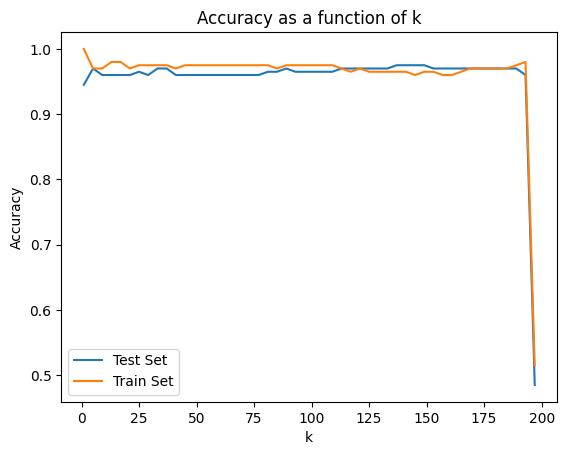

In [6]:
#Change the path to match the position of your file
#The Dataset can be loaded using the file option in Google Colab (the directory icon on the left)
Dataset1 = h5py.File('./Lab1_Ex_1_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))
splitData = int(Data.shape[0]*0.7)  # 70% of the data will be used for training
Train_Positions = np.random.choice(Data.shape[0],splitData,replace=False)   # randomly selects 70% of the data
Test_Positions = np.delete(np.arange(Data.shape[0]),Train_Positions)    # selects the remaining 30% of the data

# Train_Set = Data[Train_Positions,:]    # divides the data into a training set and a test set, training set is composed by the 70% of the data
# Test_Set = Data[Test_Positions,:]     
Train_Set = Data[:200,:]    # divides the data into a training set and a test set, training set is composed by the 70% of the data
Test_Set = Data[200:,:]   

def Euclidean_Distance(x,y):    # function to compute the Euclidean distance between two vectors
    return np.sqrt(np.sum((x-y)**2))    # returns the square root of the sum of the squared differences between the two vectors

def Manhattan_Distance(x,y):    # function to compute the Manhattan distance between two vectors
    return np.sum(np.abs(x-y))    # returns the sum of the absolute differences between the two vectors

# p -> 1 -> Manhattan Distance, p -> 2 -> Euclidean Distance, p -> inf -> Chebyshev Distance
def Minkowski_Distance(x,y,p):    # function to compute the Minkowski distance between two vectors
    if p == 'inf':    # if p is equal to infinity
        return np.max(np.abs(x-y))    # returns the maximum absolute difference between the two vectors
    else:
        return np.sum(np.abs(x-y)**p)**(1/p)    # returns the p-th root of the sum of the p-th power of the absolute differences between the two vectors

def k_NN(sample,Train_Set,k):   # function to implement the k-NN algorithm, the sample is the element to be classified, Train_Set is the training set, and k is the number of neighbors to consider
    distances = np.zeros(Train_Set.shape[0])    # creates an array of zeros with the same length as the number of rows in the training set
    for i in range(Train_Set.shape[0]):   # iterates over the rows of the training set
        distances[i] = Minkowski_Distance(sample[:-1],Train_Set[i,:-1], 2)    # computes the Euclidean distance between the sample and the i-th row of the training set, remove the class column
    sorted_indices = np.argsort(distances)  # returns an array of indices that would sort the distances array
    k_nearest = sorted_indices[:k]  # selects the first k elements of the sorted_indices array
    classes, counts = np.unique(Train_Set[k_nearest,-1],return_counts=True) # returns the unique classes found on the k nearest neighbors and the number of occurrences of each class
    return classes[np.argmax(counts)]   # returns the class with the highest number of occurrences, this is the class that we assign to the sample

# Train the model by using different values of k
k_values = np.arange(1,Train_Set.shape[0],4)   # creates an array with the values from 1 to the number of rows in the test set with a step of 4
accuracy_testset = np.zeros(len(k_values))   # creates an array of zeros with the same length as the k_values list to store the accuracies on the test set 
accuracy_trainset = np.zeros(len(k_values))   # creates an array of zeros with the same length as the k_values list to store the accuracies on the train set
for i,k in enumerate(k_values):   # iterates over the k_values list
    correct_testset = 0    # initializes the correct counter on the testset to 0
    for sample in Test_Set:    # iterates over the rows of the test set
        if k_NN(sample,Train_Set,k) == sample[-1]:    # if the predicted class is equal to the actual class
            correct_testset += 1
    accuracy_testset[i] = correct_testset/Test_Set.shape[0]    # computes the accuracy as the ratio between the correct predictions and the total number of samples
    
    correct_trainset = 0    # initializes the correct counter on the train set to 0
    for sample in Train_Set:    # iterates over the rows of the train set
        if k_NN(sample,Train_Set,k) == sample[-1]:    # if the predicted class is equal to the actual class
            correct_trainset += 1
    accuracy_trainset[i] = correct_trainset/Train_Set.shape[0]    # computes the accuracy as the ratio between the correct predictions and the total number of samples

# Plot the accuracy as a function of k
plt.plot(k_values,accuracy_testset)   # plots the accuracy on the test dataset as a function of k
plt.plot(k_values,accuracy_trainset)   # plots the accuracy on the train dataset as a function of k
plt.xlabel('k')   # sets the x-axis label
plt.ylabel('Accuracy')   # sets the y-axis label
plt.title('Accuracy as a function of k')   # sets the title of the plot
plt.legend(['Test Set','Train Set'])   # adds a legend to the plot
plt.show()   # displays the plot

**Student's comments to exercise 1**

K-nearest is an algorithm of supervised learning used for the classification of new point into a dataset of labeled data.
First, we divide the given dataset of 400 rows (samples) and 3 columns (the last one rappresent the class of the sample), into training dataset and test dataset. Training set is composed by the 70% of total rows of the dataset, the remaining 30% is used for testing. 
We use the points of the test dataset as points to be classified. For each of these we evaluate its distance with the points of the train set, then of these we select only the k nearest. Finally we assign to the the test sample the class most present in the k nearest points founded. 
We evaluate the accuracy of these decisions by evaluating how many times these are correct. We can do so cause we know the right answer, that is in the last column of the test set.
Cause we don't know the best value of k to use for these dataset, we try with all the possible values (from 1 to the number of points in the training set, cause it rapresent how many rows of the train set we consider to classify a new point) and plot the obtained accuracy.
In the plot obtained we see that the accuracy is high from the start (k = 1) but has some little changes at the beginning. I think that in this part the system is underfitting, so it is considering too few nearest point and so it can't understand properly the classes of newer samples. Then we see how the accuracy becomes stable until l reaches a value of 250, there it falls rapidly under the 50% of accuracy. I think that there the system overfits, cause it is considering too many nearest points, so it can't understand really wich is the proper class but it assign the class most common in the total dataset to any new point.

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

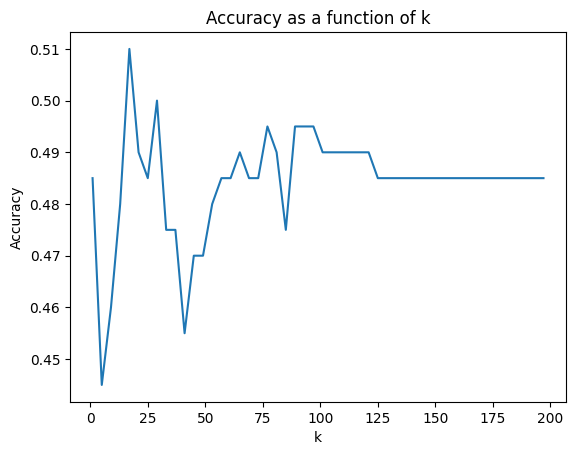

In [3]:
#Part 1

Dataset2 = h5py.File('./Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:]    # divides the data into a training set and a test set
Test_Set = Data[200:,:]

#To be completed by the student
k_values = np.arange(1,Train_Set.shape[0],4)   # creates an array with the values from 1 to the number of rows in the test set with a step of 4
accuracy = np.zeros(len(k_values))   # creates an array of zeros with the same length as the k_values list
for i,k in enumerate(k_values):   # iterates over the k_values list
    correct_trainset = 0    # initializes the correct counter to 0
    for sample in Test_Set:    # iterates over the rows of the test set
        if k_NN(sample,Train_Set,k) == sample[-1]:    # if the predicted class is equal to the actual class
            correct_trainset += 1
    accuracy[i] = correct_trainset/Test_Set.shape[0]    # computes the accuracy as the ratio between the correct predictions and the total number of samples
    if(accuracy[i-1] - accuracy[i] > 0.1):
        print("Overfitting for k = ", k)

# Plot the accuracy as a function of k
plt.plot(k_values,accuracy)   # plots the accuracy as a function of k
plt.xlabel('k')   # sets the x-axis label
plt.ylabel('Accuracy')   # sets the y-axis label
plt.title('Accuracy as a function of k')   # sets the title of the plot
plt.show()   # displays the plot

**Student's comment to part 1:**

K-nearest algorithm doesn't perform well in this case, we see that it performs with a low accuracy for each possible value of k. The max accuracy reached is of 51%, very bad result. I think that this happen due to how our dataset is composed. It has many classes (10) and very few features (11), so it is difficult for k-nearest apply classification in a dataset with few features and many possible classes. I have tried to change how the dataset is divided into train and test set, but the results still very low. In the plot we see a first part where the results are very noisy, there i think that the model is underfitting and so it is not considering enough samples to understand well the class of the new point. Then, around a value of k of 125, the system has a steady trend until the end. I think that the system there it might overfit, cause it is considering too many samples and so assign to the newer the most common class inside the train dataset, but without understand the point that it has received.

Accuracy: 0.47
Mean Squared Error: 0.6067150439571364


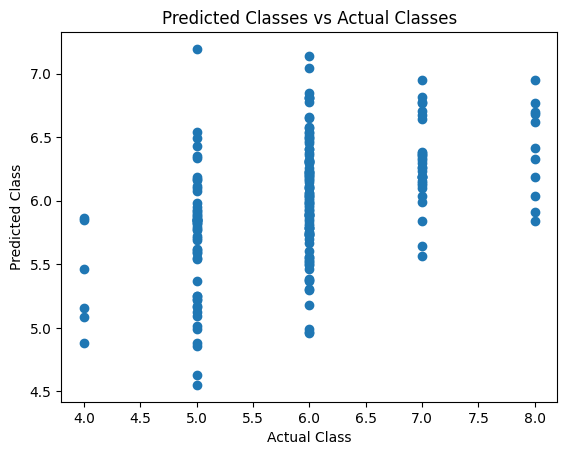

In [4]:
#Part 2
from sklearn import linear_model
clf = linear_model.LinearRegression()

#To be completed by the student
# predict the class of the test set using the linear regression model
clf.fit(Train_Set[:,:-1],Train_Set[:,-1])   # fits the linear regression model to the training set
predictions = clf.predict(Test_Set[:,:-1])   # predicts the class of the test set using the linear regression model
# estimate the accuracy and the mean squared error of the model
correct = 0    # initializes the correct counter to 0
for i in range(len(predictions)):   # iterates over the predictions
    if np.round(predictions[i]) == Test_Set[i,-1]:    # if the predicted class is equal to the actual class
        correct += 1
accuracy = correct/Test_Set.shape[0]    # computes the accuracy as the ratio between the correct predictions and the total number of samples
print(f'Accuracy: {accuracy}')   # prints the accuracy
mse = np.mean((predictions-Test_Set[:,-1])**2)   # computes the mean squared error
print(f'Mean Squared Error: {mse}')   # prints the mean squared error
# plot the predicted classes against the actual classes
plt.scatter(Test_Set[:,-1],predictions)   # plots the predicted classes against the actual classes
plt.xlabel('Actual Class')   # sets the x-axis label
plt.ylabel('Predicted Class')   # sets the y-axis label
plt.title('Predicted Classes vs Actual Classes')   # sets the title of the plot
plt.show()   # displays the plot

**Student's comments to part 2 exercise 2:**

Regression is a type of model that given a dataset of labeled data (supervised learning), they understand the reletionships between features and ground truth classes and then predict the class of a sample with a continuos value. This characteristic is the difference between regression and classification, because also classification algorithm is supervised (need a labeled dataset) but it made the predictions by assigning to each sample a value of the possible classes (finite dataset).
Linear regression is an algorithm that given a dataset of labeled data, decide the class of a new point by finding the linear relationship between the features and the actual class. It associates at each feature a weight that need to be trained during the fit. Then it uses these weights with new points to make predictions. We evalate the accuracy by counting how main true predictions has made and divide this value with the total number of tested points. The accuracy of the linear regressand in this exercise is only of 47% cause we have 6 possible classes and linear regressand finds difficult to understand compex reletionships in system with many possible classes. 
We are also determining the error of the predictions by using MSE (mean square error), evaluated by taking the mean value of the squares of the differences between the prediction and the ground trouth class of each samples. Note that the predictions are not a integer value, but they are a float value cause the regression gives continuos values as output.

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

Overfitting for k =  69


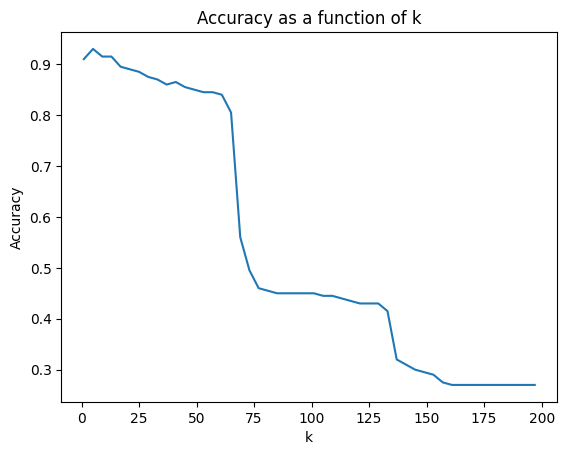

In [5]:
Dataset3 = h5py.File('./Lab1_Ex_3.hdf5')

Data = np.array(Dataset3.get('Dataset'))

Train_Set = Data[:200,:]    # divides the data into a training set and a test set
Test_Set = Data[200:,:] 

#To be completed by the student
accuracy = np.zeros(len(k_values))   # creates an array of zeros with the same length as the k_values list
for i,k in enumerate(k_values):   # iterates over the k_values list
    correct = 0    # initializes the correct counter to 0
    for sample in Test_Set:    # iterates over the rows of the test set
        if k_NN(sample,Train_Set,k) == sample[-1]:    # if the predicted class is equal to the actual class
            correct += 1
    accuracy[i] = correct/Test_Set.shape[0]    # computes the accuracy as the ratio between the correct predictions and the total number of samples
    if(accuracy[i-1] - accuracy[i] > 0.1):
        print("Overfitting for k = ", k)

# Plot the accuracy as a function of k
plt.plot(k_values,accuracy)   # plots the accuracy as a function of k
plt.xlabel('k')   # sets the x-axis label
plt.ylabel('Accuracy')   # sets the y-axis label
plt.title('Accuracy as a function of k')   # sets the title of the plot
plt.show()   # displays the plot

**Student's comments to exercise 3**

In this dataset we have many features (256) and 5 possible classes. So, unlike the previus exercise, here k-nearest algorithm has enough features to understand and classify properly newer points. At the very beginning the algorithm underfit cause it analyze very few nearest points, so it can't really understand the relations between the samples in the dataset and the new one. We see that the accuracy has a draw down trend with the increasing of k. The first big drop is between k equals to 50 and 75, there i think that the system starts to overfit. So it is using too many nearest point of the training set and so the accuracy on the test set is fallen. Then it keeps steady until it reaches around a k value of 125, then it has another fall, smaller then the first one. At the end it keeps steady until the end of the algorithm. At the end it is clearly overfitting cause it is considering all the possible samples of the training set, so there is no way that it could understand something about how to proerly classify a new sample. 